<a href="https://colab.research.google.com/github/Sibahle01/CityRide-Analysis-Series/blob/main/CityRide_Analysis_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

path1 = '/content/drive/MyDrive/Drivers_Data.csv'
path2 = '/content/drive/MyDrive/Rides_Data.csv'

driver_data = pd.read_csv(path1)
ride_data = pd.read_csv(path2)

driver_data.head()
ride_data.head()

driver_data.info()
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Driver_ID         100 non-null    int64  
 1   Name              100 non-null    object 
 2   Age               100 non-null    int64  
 3   City              100 non-null    object 
 4   Experience_Years  100 non-null    int64  
 5   Average_Rating    100 non-null    float64
 6   Active_Status     100 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 5.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ride_ID       1000 non-null   int64  
 1   Driver_ID     1000 non-null   int64  
 2   City          1000 non-null   object 
 3   Date          1000 non-null   object 
 4   Distance_km   1000 non-null   float64
 5   D

In [ ]:
driver_data.head()


,Driver_ID,Name,Age,City,Experience_Years,Average_Rating,Active_Status
0,101,William Black,56,San Francisco,15,4.8,Active
1,102,Holly Sherman,39,Los Angeles,19,4.3,Active
2,103,Crystal Cook,57,Chicago,9,4.5,Inactive
3,104,Tiffany Wright,58,San Francisco,19,4.4,Inactive
4,105,Jeffrey King,49,Los Angeles,4,4.4,Inactive


In [ ]:
ride_data.head()

,Ride_ID,Driver_ID,City,Date,Distance_km,Duration_min,Fare,Rating,Promo_Code
0,1,110,Miami,11/11/2024,5.8,8,11.01,3.8,NaN
1,2,112,Los Angeles,11/19/2024,2.6,5,5.69,4.8,NaN
2,3,147,San Francisco,11/14/2024,4.6,8,8.95,4.5,WELCOME5
3,4,120,Chicago,11/12/2024,26.5,46,54.88,4.7,SAVE20
4,5,193,San Francisco,11/7/2024,15.9,26,20.45,4.2,DISCOUNT10


In [ ]:
ride_data['Promo_Code'].fillna('No_Promo' , inplace = True)
ride_data.head()

<ipython-input-5-4049a7163816>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ride_data['Promo_Code'].fillna('No_Promo' , inplace = True)


,Ride_ID,Driver_ID,City,Date,Distance_km,Duration_min,Fare,Rating,Promo_Code
0,1,110,Miami,11/11/2024,5.8,8,11.01,3.8,No_Promo
1,2,112,Los Angeles,11/19/2024,2.6,5,5.69,4.8,No_Promo
2,3,147,San Francisco,11/14/2024,4.6,8,8.95,4.5,WELCOME5
3,4,120,Chicago,11/12/2024,26.5,46,54.88,4.7,SAVE20
4,5,193,San Francisco,11/7/2024,15.9,26,20.45,4.2,DISCOUNT10


In [ ]:
print(ride_data.isnull().sum())

Ride_ID         0
Driver_ID       0
City            0
Date            0
Distance_km     0
Duration_min    0
Fare            0
Rating          0
Promo_Code      0
dtype: int64


In [ ]:
print('/nUnique Vlues in Status Column: ')
print(driver_data['Active_Status'].unique())

/nUnique Vlues in Status Column: 
['Active' 'Inactive']


In [ ]:
driver_data['Status'] = driver_data['Active_Status'].str.capitalize

In [ ]:
print('/nRide Duration Statisics: ')
print(ride_data['Duration_min'].describe())

/nRide Duration Statisics: 
count    1000.000000
mean       49.664000
std        28.481367
min         2.000000
25%        26.000000
50%        50.000000
75%        72.000000
max       121.000000
Name: Duration_min, dtype: float64


In [ ]:
#Remove outliers

ride_data = ride_data[ride_data['Duration_min'] >=1]

**Step3: Preparing the Dataset for Analysis**

In [ ]:
merged_data = pd.merge(driver_data, ride_data, on = 'Driver_ID', how = 'left')
merged_data.head()

,Driver_ID,Name,Age,City_x,Experience_Years,Average_Rating,Active_Status,Status,Ride_ID,City_y,Date,Distance_km,Duration_min,Fare,Rating,Promo_Code
0,101,William Black,56,San Francisco,15,4.8,Active,<bound method StringMethods.capitalize of <pan...,110,Miami,11/26/2024,12.9,30,23.92,4.7,WELCOME5
1,101,William Black,56,San Francisco,15,4.8,Active,<bound method StringMethods.capitalize of <pan...,255,Chicago,11/15/2024,37.4,87,110.47,4.2,No_Promo
2,101,William Black,56,San Francisco,15,4.8,Active,<bound method StringMethods.capitalize of <pan...,627,Los Angeles,11/28/2024,22.3,37,33.50,3.9,WELCOME5
3,101,William Black,56,San Francisco,15,4.8,Active,<bound method StringMethods.capitalize of <pan...,648,Chicago,11/25/2024,24.7,53,19.85,4.6,SAVE20
4,101,William Black,56,San Francisco,15,4.8,Active,<bound method StringMethods.capitalize of <pan...,665,San Francisco,11/29/2024,18.1,37,19.95,4.7,DISCOUNT10


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Driver_ID         1000 non-null   int64  
 1   Name              1000 non-null   object 
 2   Age               1000 non-null   int64  
 3   City_x            1000 non-null   object 
 4   Experience_Years  1000 non-null   int64  
 5   Average_Rating    1000 non-null   float64
 6   Active_Status     1000 non-null   object 
 7   Status            1000 non-null   object 
 8   Ride_ID           1000 non-null   int64  
 9   City_y            1000 non-null   object 
 10  Date              1000 non-null   object 
 11  Distance_km       1000 non-null   float64
 12  Duration_min      1000 non-null   int64  
 13  Fare              1000 non-null   float64
 14  Rating            1000 non-null   float64
 15  Promo_Code        1000 non-null   object 
dtypes: float64(4), int64(5), object(7)
memory u

In [ ]:
merged_data['Revenue_per_ride'] = merged_data['Fare']/merged_data['Distance_km']
merged_data.head()

,Driver_ID,Name,Age,City_x,Experience_Years,Average_Rating,Active_Status,Status,Ride_ID,City_y,Date,Distance_km,Duration_min,Fare,Rating,Promo_Code,Revenue_per_ride
0,101,William Black,56,San Francisco,15,4.8,Active,<bound method StringMethods.capitalize of <pan...,110,Miami,11/26/2024,12.9,30,23.92,4.7,WELCOME5,1.854264
1,101,William Black,56,San Francisco,15,4.8,Active,<bound method StringMethods.capitalize of <pan...,255,Chicago,11/15/2024,37.4,87,110.47,4.2,No_Promo,2.953743
2,101,William Black,56,San Francisco,15,4.8,Active,<bound method StringMethods.capitalize of <pan...,627,Los Angeles,11/28/2024,22.3,37,33.50,3.9,WELCOME5,1.502242
3,101,William Black,56,San Francisco,15,4.8,Active,<bound method StringMethods.capitalize of <pan...,648,Chicago,11/25/2024,24.7,53,19.85,4.6,SAVE20,0.803644
4,101,William Black,56,San Francisco,15,4.8,Active,<bound method StringMethods.capitalize of <pan...,665,San Francisco,11/29/2024,18.1,37,19.95,4.7,DISCOUNT10,1.102210


In [ ]:
merged_data['Duration'] = merged_data['Duration_min'].astype(int)

In [ ]:
## Diplay the final Dataset

print('/nFinal Dataset: ')
print(merged_data.head())

/nFinal Dataset: 
   Driver_ID           Name  Age         City_x  Experience_Years  \
0        101  William Black   56  San Francisco                15   
1        101  William Black   56  San Francisco                15   
2        101  William Black   56  San Francisco                15   
3        101  William Black   56  San Francisco                15   
4        101  William Black   56  San Francisco                15   

   Average_Rating Active_Status  \
0             4.8        Active   
1             4.8        Active   
2             4.8        Active   
3             4.8        Active   
4             4.8        Active   

                                              Status  Ride_ID         City_y  \
0  <bound method StringMethods.capitalize of <pan...      110          Miami   
1  <bound method StringMethods.capitalize of <pan...      255        Chicago   
2  <bound method StringMethods.capitalize of <pan...      627    Los Angeles   
3  <bound method StringMethods.capit

**Episode 3: Analyzing the Dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
avg_duration = merged_data['Duration_min'].mean()
avg_distance = merged_data['Distance_km'].mean()

print(f'Average Duration: {avg_duration:.2f} minutes')
print(f'Average Distance: {avg_distance:.2f} miles')

Average Duration: 49.66 minutes
Average Distance: 25.26 miles


In [ ]:
#Identify ineffircient rides(eg duration > 30 minutes)
inefficient_rides = merged_data[merged_data['Duration_min'] > 30]
print(f'Number of inefficient rides: {len(inefficient_rides)}')

Number of inefficient rides: 704


**Step 2: Driver Perfomence Analysis**

In [ ]:
avg_ratings_driver = merged_data.groupby('Driver_ID')['Average_Rating'].mean().sort_values(ascending = False)

print("Top 5 Drivers by Average Rating:")  # Drivers with high ratings
print(avg_ratings_driver.head())

Top 5 Drivers by Average Rating:
Driver_ID
122    5.0
107    5.0
123    5.0
119    5.0
170    5.0
Name: Average_Rating, dtype: float64


In [ ]:
print("Bottom 5 Drivers by Average Rating:")  # Drivers with low ratings
print(avg_ratings_driver.tail())

Bottom 5 Drivers by Average Rating:
Driver_ID
143    4.1
155    4.0
154    4.0
163    4.0
136    4.0
Name: Average_Rating, dtype: float64


**Step 3: Revenue Trends**

In [ ]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
daily_revenue = merged_data.groupby('Date')['Fare'].sum()

In [ ]:
print("Daily Revenue Trends:")
print(daily_revenue.head())

Daily Revenue Trends:
Date
2024-11-01     949.02
2024-11-02     989.74
2024-11-03    1884.69
2024-11-04    1450.00
2024-11-05    1302.48
Name: Fare, dtype: float64


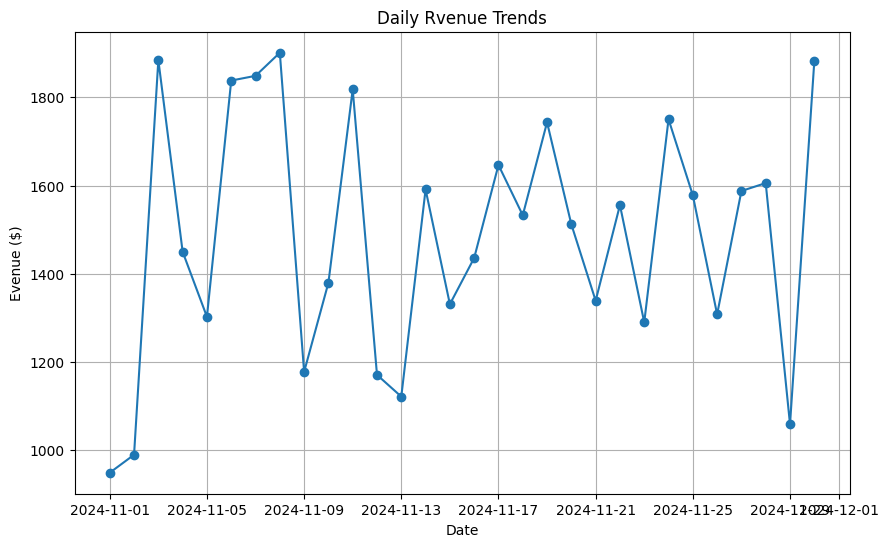

In [ ]:
## Lets plot it for better Analysis

import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plt.plot(daily_revenue.index, daily_revenue.values, marker = 'o')
plt.title('Daily Rvenue Trends')
plt.xlabel('Date')
plt.ylabel('Evenue ($)')
plt.grid(True)
plt.show()


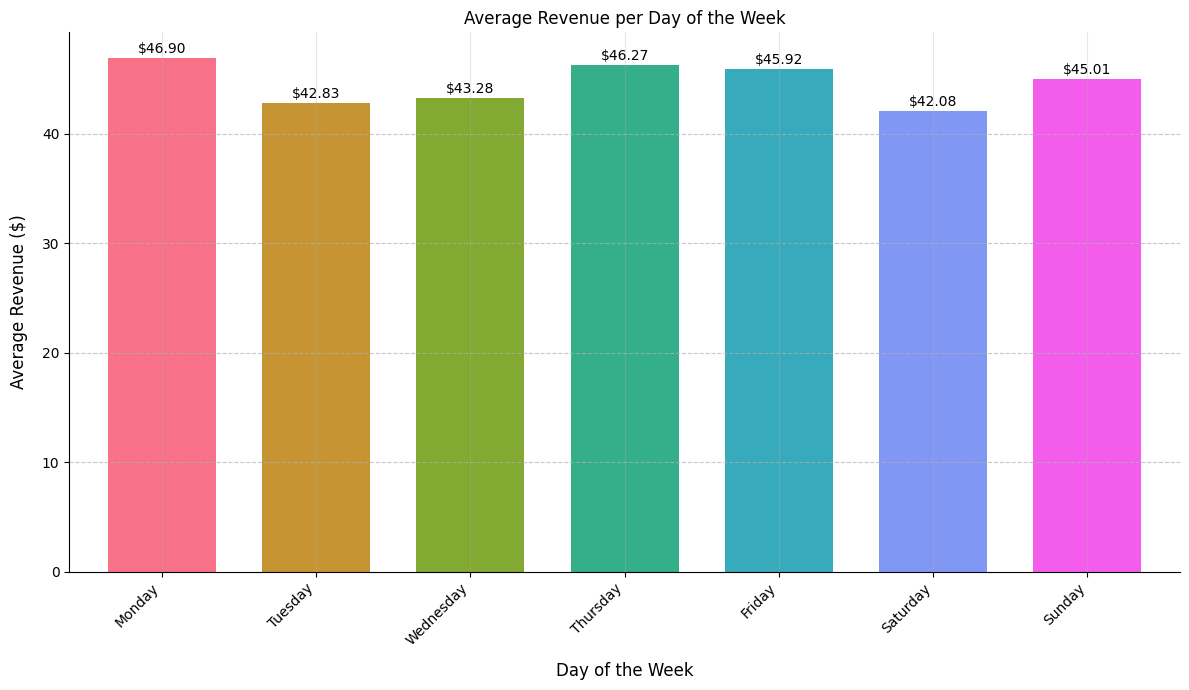

In [ ]:
## Lets do the analysis per week

merged_data['Day_of_Week'] = merged_data['Date'].dt.day_name()

avg_revenue_per_day = merged_data.groupby('Day_of_Week')['Fare'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

plt.figure(figsize = (12,7))
ax = avg_revenue_per_day.plot(
    kind = 'bar',
    color = sns.color_palette('husl', 7),
    width = 0.7
)

plt.title('Average Revenue per Day of the Week')
plt.xlabel('Day of the Week', labelpad = 10, fontsize = 12)
plt.ylabel('Average Revenue ($)', labelpad = 10, fontsize = 12)
plt.xticks(rotation = 45, ha = 'right')

for i, v in enumerate(avg_revenue_per_day):
    ax.text(
        i,
        v + (avg_revenue_per_day.max() * 0.01),  # Slightly above the bar
        f'${v:,.2f}',  # Format as currency
        ha='center',  # Center alignment
        fontsize=10
    )

plt.tight_layout()
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

for spine in ['top', 'right']:
  ax.spines[spine].set_visible(False)

plt.show()

Customer Rating Distribution:
Average_Rating
4.8    19.0
4.9    13.9
4.4    12.3
5.0    10.2
4.3     8.2
4.1     8.1
4.6     7.4
4.5     7.2
4.2     6.3
4.0     3.9
4.7     3.5
Name: proportion, dtype: float64

Factors affecting moderately low ratings (Ratings < 5):

Promo Codes in Moderate Low Ratings:
Promo_Code
No_Promo      26.726058
DISCOUNT10    24.832962
SAVE20        24.276169
WELCOME5      24.164811
Name: proportion, dtype: float64

Driver Experience in Moderate Low Ratings:
Driver_ID
187     1.0
172     1.0
111     2.0
118     2.0
126     2.0
       ... 
190    20.0
137    20.0
178    20.0
142    20.0
200    20.0
Name: Experience_Years, Length: 91, dtype: float64

Ride Duration in Moderate Low Ratings:
count    898.000000
mean      49.650334
std       28.502072
min        2.000000
25%       26.000000
50%       50.000000
75%       72.000000
max      121.000000
Name: Duration_min, dtype: float64

Fare in Moderate Low Ratings:
count    898.000000
mean      44.511904
std       32

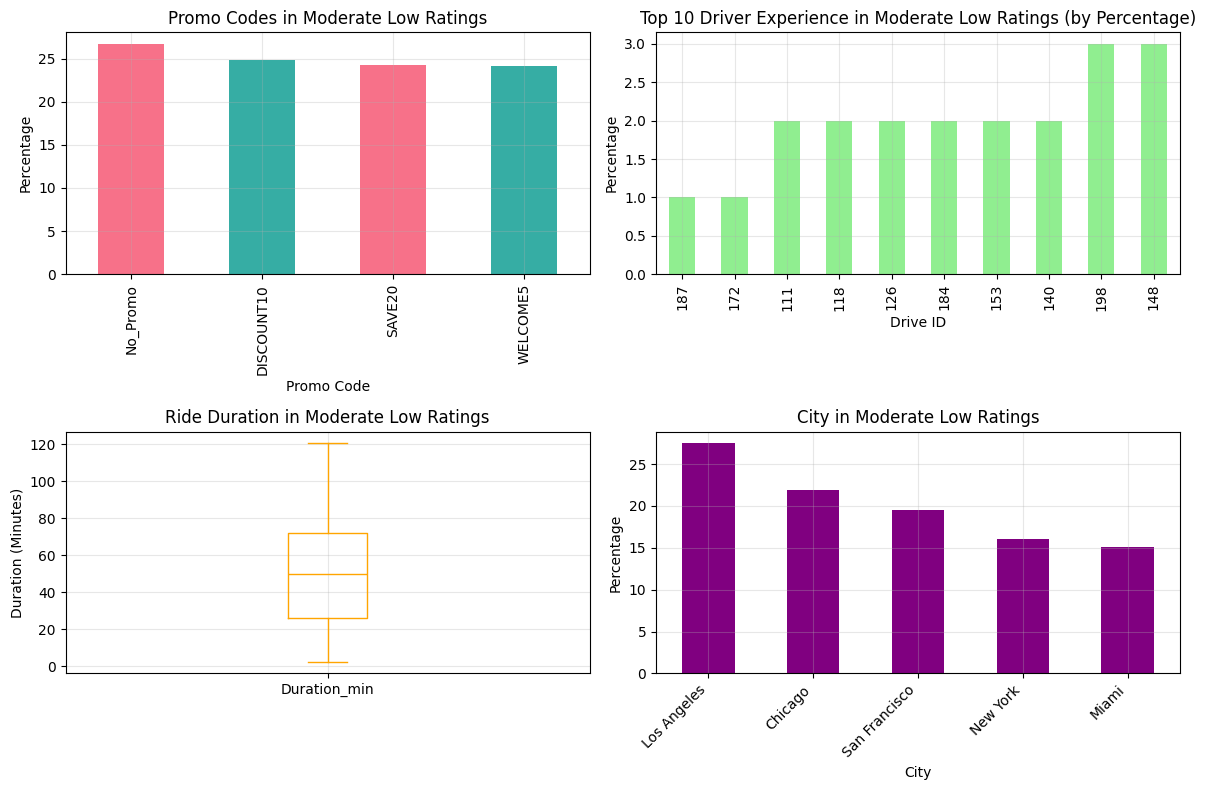

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing Rating Distributionmerged_data
rating_distribution = ['Average_Rating'].value_counts(normalize=True) * 100
print('Customer Rating Distribution:')
print(rating_distribution)

# Identifying rides with ratings < 5
moderately_low_rated_rides = merged_data[merged_data['Average_Rating'] < 5]

# Analyze factors affecting moderately low ratings
print('\nFactors affecting moderately low ratings (Ratings < 5):')

# 1. Promo Codes
promo_code_analysis = moderately_low_rated_rides['Promo_Code'].value_counts(normalize=True) * 100
print("\nPromo Codes in Moderate Low Ratings:")
print(promo_code_analysis)

# 2. Driver Experience
driver_experience_analysis = moderately_low_rated_rides.groupby("Driver_ID")['Experience_Years'].mean().sort_values()
print("\nDriver Experience in Moderate Low Ratings:")
print(driver_experience_analysis)

# 3. Ride Duration
duration_analysis = moderately_low_rated_rides['Duration_min'].describe()
print("\nRide Duration in Moderate Low Ratings:")
print(duration_analysis)

# 4. Fare
fare_analysis = moderately_low_rated_rides['Fare'].describe()
print("\nFare in Moderate Low Ratings:")
print(fare_analysis)

# 5. City
city_analysis = moderately_low_rated_rides['City_x'].value_counts(normalize=True) * 100
print("\nCity in Moderate Low Ratings:")
print(city_analysis)

# Visualization
if not moderately_low_rated_rides.empty:
    plt.figure(figsize=(12, 8))

    # Promo Code
    plt.subplot(2, 2, 1)
    promo_code_analysis.plot(kind='bar', color=sns.color_palette('husl', 2))
    plt.title('Promo Codes in Moderate Low Ratings')
    plt.xlabel('Promo Code')
    plt.ylabel('Percentage')

    # Driver Experience
    plt.subplot(2, 2, 2)
    driver_experience_analysis.head(10).plot(kind='bar', color='lightgreen')
    plt.title('Top 10 Driver Experience in Moderate Low Ratings (by Percentage)')
    plt.xlabel('Drive ID')
    plt.ylabel('Percentage')

    # Ride Duration
    plt.subplot(2, 2, 3)
    moderately_low_rated_rides['Duration_min'].plot(kind='box', color='orange')
    plt.title('Ride Duration in Moderate Low Ratings')
    plt.ylabel('Duration (Minutes)')

    # City
    plt.subplot(2, 2, 4)
    city_analysis.plot(kind='bar', color='purple')
    plt.title('City in Moderate Low Ratings')
    plt.xlabel('City')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

    plt.tight_layout()
    plt.show()

else:
    print("\nNo rides with moderately low ratings (ratings < 5) found.")

In [ ]:
from google.colab import files

# Save the dataset as a CSV file
merged_data.to_csv('CityRide_Analysis_dataset.csv', index=False)

# Download the file
files.download('CityRide_Analysis_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>